# Clustering data
Clustering is one of the 3 machine learning types we are working with in this course. Clustering data samples is something we do when we want to learn something from data that is unsupervized (Doesnt have a label). The starting point is therefore a set of data samples, that we without any categorization (we know nothing about the data from the outset)

When we have unlabeled data we must use unsupervised learning techniques for our models like clustering data samples to find patterns and similarities in sample sub groups.

## How do we find clusters?
<img src="images/clusters.png" width=300>

Humans are quite good in quickly finding clusters when looking at the data visualizations above. The problem is, how to make a machine find clusters.

http://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py

## Meanshift
One algorithm for finding cluster in a dataset is meanshift from sklearn.cluster.Meanshift  
A key tool in working with meanshift is the concept of bandwith.
#### Bandwith is the size of the cirle within which we analyze the data
And the size of the circle is important because all data covered by the circle is evaluated with respect to density (the distance between one data point and the others). The window moves around to find the highest density in its population.

Below shows how a circle window is moving into the center of a cluster
![](images/meanshift.gif)
The cirle window above would be one of many windows that are distributed over the feature space.
The circle moves towards the highest density of feature vectors. The mean of the distance to each neighbour is calculated and the circle is moved to the mean value. This happens over several iterations untill all windows are finished moving. Finally all windows on same location are merged and all features are moved to neares cluster.

Choosing initial number of windows, size of windows, distance between neighbours etc. 
![](https://i.stack.imgur.com/A871k.jpg)


In [1]:
%pylab inline 
from sklearn.cluster import MeanShift, estimate_bandwidth
# The bandwidth is the distance/size scale of the kernel function, i.e. 
# sklearn.cluster module offers an estimate_bandwith() function based on a nearest-neighbor analysis.
# quantile should be between [0, 1] 0.5 means that the median of all pairwise distances is used
# n_samples: default=None. The number of samples to use. If not given, all samples are used.


def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth) #, bin_seeding=True) # can be used to speed up process, since fewer kernels are created.
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Create sample data for 2d and 3d feature spaces

In [3]:
from matplotlib import pyplot as plt
%matplotlib notebook
# 2D data generated and meanshift used to find labels, cluster centers and amount of clusters
from itertools import cycle
from sklearn.datasets import make_blobs

centers = [[2, 1], [0, 0], [1, -1]] # centers are now 2-d
data_2d, _ = make_blobs(n_samples=2500, centers=centers, cluster_std=0.1)

labels, cluster_centers, n_clusters = mean_shift(data_2d)

# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
print(list(zip(range(3),colors)))
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))

Number of estimated clusters : 3


<IPython.core.display.Javascript object>

[(0, 'b'), (1, 'g'), (2, 'r')]


Text(0.5, 1.0, 'Estimated number of clusters: 3')

In [ ]:
%matplotlib notebook
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D

# Same example with 3D data
centers = [[2, 1, 0], [0, -1, -1], [1, -1, 3]]
data_3d, _ = make_blobs(n_samples=2500, centers=centers, cluster_std=0.37)

labels, cluster_centers, n_clusters = mean_shift(data_3d)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y, z = data_3d[my_members,0], data_3d[my_members,1], data_3d[my_members,2]
    ax.scatter(x, y, z, c=col,  linewidth=0.2, alpha=0.1)
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], s=150, c='k')
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

## The 3 iris flowers
**Iris Setosa**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="drawing" width="200"/>

**Iris Versicolor**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg" alt="drawing" width="200"/>
**Iris Virginica**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/440px-Iris_virginica.jpg" alt="drawing" width="200"/>
**Petals and Sepals**
<img src="https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png" alt="drawing" width="200"/>

In [1]:
# The data for the following exercise comes from sklearn.
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
target = iris.target
flower_types = iris.target_names
features = iris.feature_names
print(f'Features: {features}\nData example:\n{data[:3]}')

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data example:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [2]:
!cat data/iris_data.csv

Sepal length,Sepal width,Petal length,Petal width,Species
"5,10","3,50","1,40","0,20",I. setosa
"4,90","3,00","1,40","0,20",I. setosa
"4,70","3,20","1,30","0,20",I. setosa
"4,60","3,10","1,50","0,20",I. setosa
"5,00","3,60","1,40","0,20",I. setosa
"5,40","3,90","1,70","0,40",I. setosa
"4,60","3,40","1,40","0,30",I. setosa
"5,00","3,40","1,50","0,20",I. setosa
"4,40","2,90","1,40","0,20",I. setosa
"4,90","3,10","1,50","0,10",I. setosa
"5,40","3,70","1,50","0,20",I. setosa
"4,80","3,40","1,60","0,20",I. setosa
"4,80","3,00","1,40","0,10",I. setosa
"4,30","3,00","1,10","0,10",I. setosa
"5,80","4,00","1,20","0,20",I. setosa
"5,70","4,40","1,50","0,40",I. setosa
"5,40","3,90","1,30","0,40",I. setosa
"5,10","3,50","1,40","0,30",I. setosa
"5,70","3,80","1,70","0,30",I. setosa
"5,10","3,80","1,50","0,30",I. setosa
"5,40","3,40","1,70","0,20",I. setosa
"5,10","3,70","1,50","0,40",I. setosa
"4,60","3,60","1,00","0,20",I. setosa
"5,10","3,30","1,70","0,50",I. setosa
"4,80","3,40","1,90","0,20",I.

In [3]:
import pandas as pd
iris = pd.read_csv('data/iris_data.csv')
iris.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,"5,10","3,50","1,40","0,20",I. setosa
1,"4,90","3,00","1,40","0,20",I. setosa
2,"4,70","3,20","1,30","0,20",I. setosa
3,"4,60","3,10","1,50","0,20",I. setosa
4,"5,00","3,60","1,40","0,20",I. setosa


## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
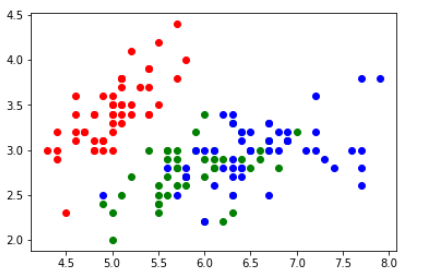
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

## Self study - image segmentation

Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics. [Source]()https://en.wikipedia.org/wiki/Image_segmentation

In [ ]:
%matplotlib notebook
import os
import cv2
from modules import webget

# url = 'https://github.com/opencv/opencv/raw/master/samples/data/rubberwhale2.png'
url = 'https://github.com/opencv/opencv/raw/master/samples/data/baboon.jpg'
# url = 'https://github.com/mattnedrich/MeanShift_py/raw/master/sample_images/mean_shift_image.jpg'
webget.download(url,'data/baboon.jpg')

#img = cv2.imread(os.path.basename(url))
img = cv2.imread('data/baboon.jpg')
print(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]

plt.imshow(img, interpolation='none')

![](data/baboon.jpg)

In [ ]:
# Using meanshift to cluster pixels in color image
lab_image = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
img = cv2.medianBlur(lab_image, 5)
    
img_lst = img.reshape((img.shape[0] * img.shape[1], 3))
img_lst_orig = np.copy(img_lst) 

labels, cluster_centers, n_clusters = mean_shift(img_lst)

label_img = labels.reshape(height, width)
for l in range(n_clusters):
    img[label_img == l] = cluster_centers[l]

rgb_segments = cv2.cvtColor(img, cv2.COLOR_Lab2RGB)

In [ ]:
plt.figure() 
plt.imshow(rgb_segments, interpolation='none')

In [ ]:
# Plot the segmentet pixel clusters
from itertools import cycle

labels, cluster_centers, n_clusters = mean_shift(img_lst_orig)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = cycle('cmybgr')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y, z = img_lst_orig[my_members,0], img_lst_orig[my_members,1], img_lst_orig[my_members,2]
    ax.scatter(x, y, z, c=col,  linewidth=0.2, alpha=0.1)
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], s=150, c='k')
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

In [ ]:
print(cluster_centers)

# Self study on meanshift

  * http://stackoverflow.com/a/17912660
  * http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/
  * https://en.wikipedia.org/wiki/Mean_shift
  * https://github.com/mattnedrich/MeanShift_py

```bash
git clone https://github.com/mattnedrich/MeanShift_py.git
```

http://stackoverflow.com/a/17912660 explaining the mean shift algorithm.